# IMPORTING DATASETS

In [0]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [0]:
# Importing the libraries
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# hide warnings
import warnings
warnings.filterwarnings('ignore')


#importing datasets

import io
data = pd.read_csv(io.BytesIO(uploaded['covid_19_data.csv']))


# replacing Mainland china with just China
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

# making observationDate as datetime and setting frequency
data['ObservationDate']= pd.to_datetime(data['ObservationDate'])
data['ObservationDate'].freq='D'

data.drop(['SNo'],axis = 1,inplace= True)

# Changing Datatypes of 'Confirmed', 'Deaths' and 'Recovered'
data[['Confirmed','Deaths','Recovered']]=data[['Confirmed','Deaths','Recovered']].astype(int)

In [0]:
data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
15126,2020-04-14,Wyoming,US,2020-04-14 23:41:11,282,1,0
15127,2020-04-14,Xinjiang,China,2020-04-14 23:41:11,76,3,73
15128,2020-04-14,Yukon,Canada,2020-04-14 23:41:11,8,0,0
15129,2020-04-14,Yunnan,China,2020-04-14 23:41:11,184,2,175


### Active cases for day(i) = Confirmed(i) - (recovered (i)+ death (i))

In [0]:
# Creating column of Active Case
data['Active']=data['Confirmed']-(data['Recovered']+data['Deaths'])
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0,1
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0,14
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0,6
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0,1
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0,0


In [0]:
data.describe()

,Confirmed,Deaths,Recovered,Active
count,15131.000000,15131.000000,15131.000000,15131.000000
mean,2061.836759,108.210165,502.725530,1450.901064
std,11189.202681,913.498994,4117.613616,8071.466941
min,0.000000,0.000000,0.000000,-47763.000000
25%,6.000000,0.000000,0.000000,4.000000
50%,72.000000,1.000000,1.000000,32.000000
75%,481.000000,5.000000,37.000000,277.000000
max,203020.000000,21067.000000,68200.000000,192178.000000


### Countries affected by covid

In [0]:
#listing all the countries where the virus has spread to
countries=data['Country/Region'].unique().tolist()
print(countries)
print(len(countries))

['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary'

In [0]:
worldwide = data.groupby('ObservationDate').sum().reset_index()
worldwide

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,653,18,30,605
2,2020-01-24,941,26,36,879
3,2020-01-25,1438,42,39,1357
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
79,2020-04-10,1691719,102525,376096,1213098
80,2020-04-11,1771514,108503,402110,1260901
81,2020-04-12,1846680,114090,421722,1310868
82,2020-04-13,1917320,119483,448655,1349182


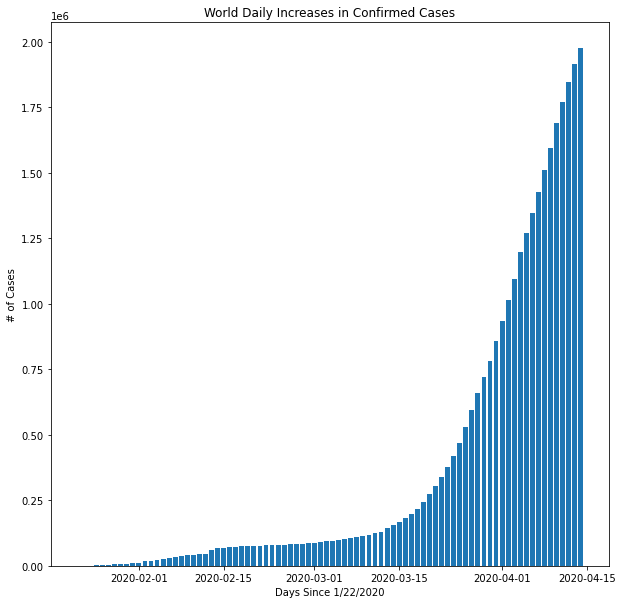

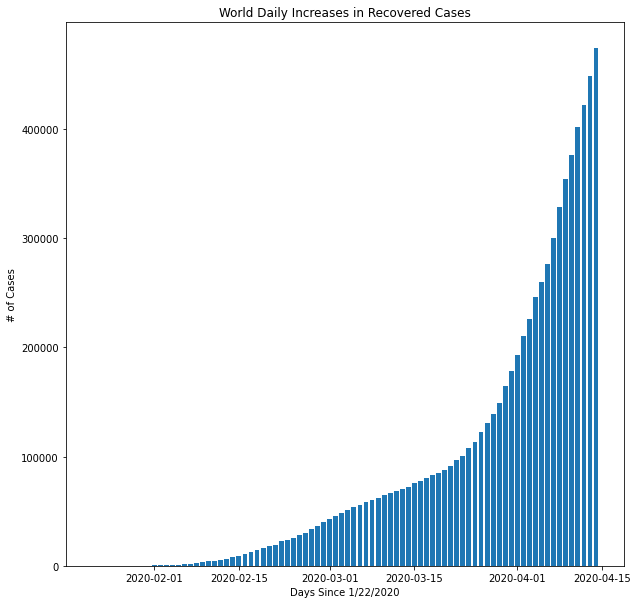

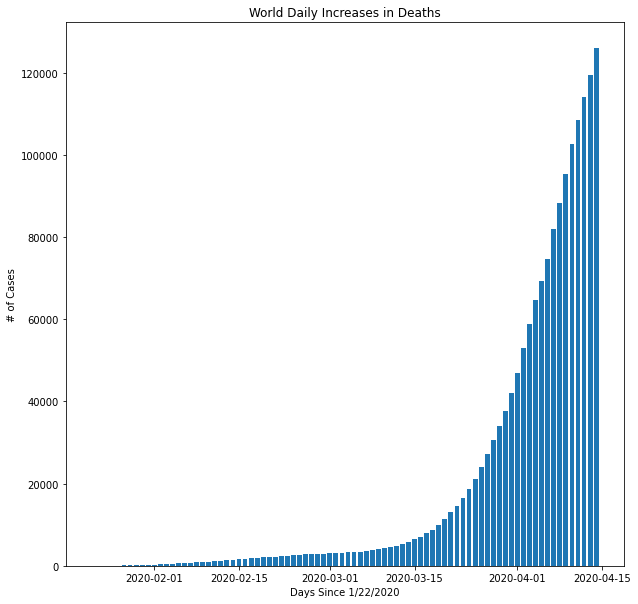

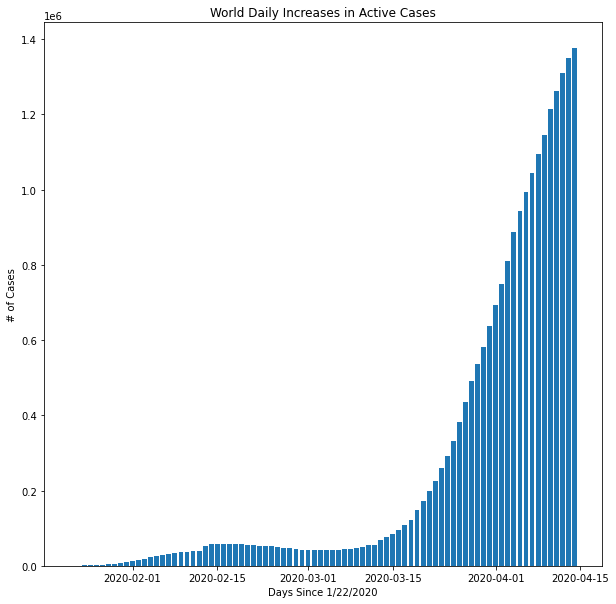

In [0]:
plt.figure(figsize=(10,10))
plt.bar(worldwide['ObservationDate'],worldwide['Confirmed'])
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(worldwide['ObservationDate'],worldwide['Recovered'])
plt.title('World Daily Increases in Recovered Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(worldwide['ObservationDate'],worldwide['Deaths'])
plt.title('World Daily Increases in Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(worldwide['ObservationDate'],worldwide['Active'])
plt.title('World Daily Increases in Active Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()



In [0]:

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Active'],
                    mode='lines+markers',
                    name='Active'))


fig.show()

In [0]:
uploaded = files.upload()

Saving COVID19_line_list_data.csv to COVID19_line_list_data.csv


In [0]:
covid = pd.read_csv(io.BytesIO(uploaded['COVID19_line_list_data.csv']))
covid

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
covid.isna().any()

id                       False
case_in_country           True
reporting date            True
Unnamed: 3                True
summary                   True
location                 False
country                  False
gender                    True
age                       True
symptom_onset             True
If_onset_approximated     True
hosp_visit_date           True
exposure_start            True
exposure_end              True
visiting Wuhan           False
from Wuhan                True
death                    False
recovered                False
symptom                   True
source                   False
link                     False
Unnamed: 21               True
Unnamed: 22               True
Unnamed: 23               True
Unnamed: 24               True
Unnamed: 25               True
Unnamed: 26               True
dtype: bool

In [0]:
gender = covid['gender'].dropna()
gender = pd.DataFrame(data = gender)
gender

,gender
0,male
1,female
2,male
3,female
4,male
...,...
1077,female
1078,female
1082,male
1083,male


In [0]:
gender['gender'].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [0]:
gender = pd.DataFrame({'Gender': ['Male','Female'],
                   'Count': [520,382]})
gender

,Gender,Count
0,Male,520
1,Female,382


In [0]:
fig = px.pie(gender, values='Count',color='Gender', title='Analysis gender ratio in covid cases')
fig.show()

In [0]:
age = covid['age'].value_counts()
age = pd.DataFrame(data = age)
age.sort_values('age', ascending= False)
age = age.rename(columns={'age': 'count'})
age['age'] = age.index
age

,count,age
55.0,72,55.0
65.0,52,65.0
45.0,39,45.0
75.0,37,75.0
35.0,36,35.0
...,...,...
1.0,1,1.0
0.5,1,0.5
87.0,1,87.0
84.0,1,84.0


In [0]:
fig = px.bar(age, x="age", y='count')
fig.update_layout(
    title="Age distribution",
    xaxis_title="Age",
    yaxis_title="No of cases"
)
fig.show()

### COUNTRY WISE

In [0]:
country_cases = data.groupby('Country/Region', as_index=False).sum()
country_cases["Mortality Rate (per 100)"] = np.round(100*country_cases["Deaths"]/country_cases["Confirmed"],2)
country_cases

,Country/Region,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
0,Azerbaijan,1,0,0,1,0.00
1,"('St. Martin',)",2,0,0,2,0.00
2,Afghanistan,7444,208,341,6895,2.79
3,Albania,7572,383,2318,4871,5.06
4,Algeria,26085,3124,4493,18468,11.98
...,...,...,...,...,...,...
215,Western Sahara,46,0,0,46,0.00
216,Yemen,5,0,0,5,0.00
217,Zambia,755,18,193,544,2.38
218,Zimbabwe,215,38,0,177,17.67


### COVID CASES BY COUNTRY RANKING

In [0]:
country_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Mortality Rate (per 100)"])

,Country/Region,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
205,US,6886003,219107,353340,6313556,3.180000
43,China,5321801,192276,3462768,1666757,3.610000
101,Italy,3139708,358875,515773,2265060,11.430000
186,Spain,2746558,253417,748696,1744445,9.230000
76,Germany,2117675,34001,656844,1426830,1.610000
70,France,1878998,167567,340945,1370486,8.920000
97,Iran,1404759,88961,591248,724550,6.330000
204,UK,1019040,106910,6943,905187,10.490000
203,Turkey,591660,12207,28220,551233,2.060000
192,Switzerland,470881,14447,134183,322251,3.070000


In [0]:
top_countries=country_cases.sort_values('Confirmed', ascending= False).head(10)
top_countries

,Country/Region,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
205,US,6886003,219107,353340,6313556,3.18
43,China,5321801,192276,3462768,1666757,3.61
101,Italy,3139708,358875,515773,2265060,11.43
186,Spain,2746558,253417,748696,1744445,9.23
76,Germany,2117675,34001,656844,1426830,1.61
70,France,1878998,167567,340945,1370486,8.92
97,Iran,1404759,88961,591248,724550,6.33
204,UK,1019040,106910,6943,905187,10.49
203,Turkey,591660,12207,28220,551233,2.06
192,Switzerland,470881,14447,134183,322251,3.07


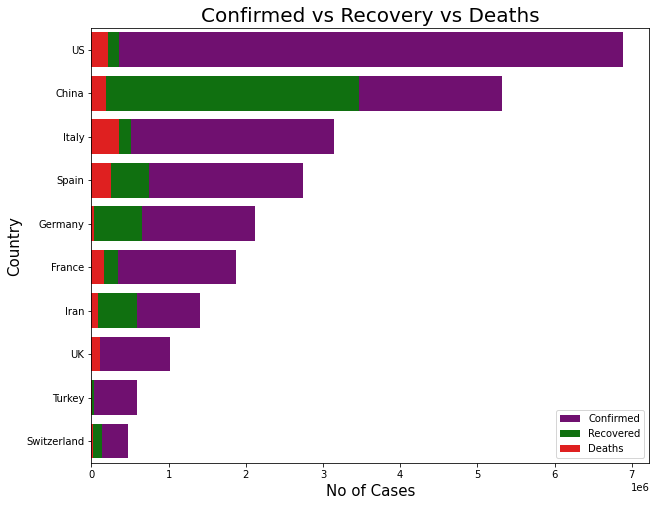

In [0]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
bar1 = sns.barplot(x="Confirmed",y="Country/Region",data=top_countries,
            label="Confirmed", color="Purple")

bar2 = sns.barplot(x="Recovered", y="Country/Region", data=top_countries,
            label="Recovered", color="green")


bar3 = sns.barplot(x="Deaths", y="Country/Region", data=top_countries,
            label="Deaths", color="red")


plt.xlabel('No of Cases', fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('Confirmed vs Recovery vs Deaths',fontsize=20)
ax.legend(loc=4, ncol = 1)
plt.show()

In [0]:
Countries = data.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()

### Plotting Confirmed, Active and Deaths for all countries

In [0]:
fig = px.line(Countries, x="ObservationDate", y="Confirmed", color='Country/Region', height=600,
             title='Confirmed cases over time')
fig.show()

In [0]:
fig = px.line(Countries, x="ObservationDate", y="Recovered", color='Country/Region', height=600,
             title='Recovered cases over time')
fig.show()

In [0]:
fig = px.line(Countries, x="ObservationDate", y="Deaths", color='Country/Region', height=600,
             title='Deaths over time')
fig.show()

# CHINA

In [0]:
China = Countries.loc[(Countries['Country/Region'] == 'China')]

In [0]:
China = China.set_index(China['ObservationDate'])
China.index.freq='D'
China

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,,,
2020-01-22,2020-01-22,China,547,17,28,502
2020-01-23,2020-01-23,China,639,18,30,591
2020-01-24,2020-01-24,China,916,26,36,854
2020-01-25,2020-01-25,China,1399,42,39,1318
2020-01-26,2020-01-26,China,2062,56,49,1957
...,...,...,...,...,...,...
2020-04-10,2020-04-10,China,81907,3336,77472,1099
2020-04-11,2020-04-11,China,81969,3339,77531,1099
2020-04-12,2020-04-12,China,82085,3339,77583,1163


In [0]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))

fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Active'],
                    mode='lines+markers',
                    name='Active'))



fig.show()

In [0]:
CProvinces = data.loc[(data['Country/Region'] == 'China')]
CProvinces

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0,1
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0,14
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0,6
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0,1
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0,0
...,...,...,...,...,...,...,...,...
15114,2020-04-14,Tianjin,China,2020-04-14 23:41:11,185,3,168,14
15115,2020-04-14,Tibet,China,2020-04-14 23:41:11,1,0,1,0
15127,2020-04-14,Xinjiang,China,2020-04-14 23:41:11,76,3,73,0
15129,2020-04-14,Yunnan,China,2020-04-14 23:41:11,184,2,175,7


In [0]:
fig = px.line(CProvinces, x="ObservationDate", y="Confirmed", color="Province/State")
fig.show()

In [0]:
cprov = CProvinces.groupby('Province/State', as_index=False).sum()
cprov["Mortality Rate (per 100)"] = np.round(100*cprov["Deaths"]/cprov["Confirmed"],2)
cprov.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Mortality Rate (per 100)"])

,Province/State,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
12,Hubei,4386532,185255,2770190,1431087,4.220000
5,Guangdong,100167,441,71769,27957,0.440000
11,Henan,89876,1340,69776,18760,1.490000
30,Zhejiang,88892,55,67228,21609,0.060000
13,Hunan,72665,246,56882,15537,0.340000
0,Anhui,69433,383,53337,15713,0.550000
16,Jiangxi,65790,65,50586,15139,0.100000
22,Shandong,50705,375,37179,13151,0.740000
15,Jiangsu,44515,0,34575,9940,0.000000
2,Chongqing,41392,389,30507,10496,0.940000


### Forecasting Confirmed Cases in China using ARIMA

In [0]:
from pmdarima import auto_arima
auto_arima(China['Confirmed'],seasonal=False).summary()

ModuleNotFoundError: ignored

In [0]:
# Set one month for testing
train = China['Confirmed'].loc[:'2020-03-29']
test = China['Confirmed'].loc['2020-03-29':]

In [0]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   66
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -592.951
Method:                       css-mle   S.D. of innovations           1919.120
Date:                Sat, 18 Apr 2020   AIC                           1191.903
Time:                        19:18:04   BIC                           1198.471
Sample:                    01-24-2020   HQIC                          1194.498
                         - 03-29-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.8560     68.965     -0.157      0.875    -146.024     124.313
ma.L1.D2.Confirmed    -0.7206      0.095     -7.550      0.000      -0.908      -0.534
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3877           +0.0000j            1.3877            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [0]:
test

In [0]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


fig.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test))
print(mean_absolute_error(test, predictions))
print(np.sqrt(mean_squared_error(test,predictions)))

Standard deviation of test data:  234.33281569620317
738.0425817458223
978.8956881523809


# USA

In [0]:
USA = Countries.loc[(Countries['Country/Region'] == 'US')]
USA = USA.set_index(USA['ObservationDate'])
USA.index.freq='D'
USAStates = data.loc[(data['Country/Region'] == 'US')]
USAStates

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
31,2020-01-22,Washington,US,1/22/2020 17:00,1,0,0,1
69,2020-01-23,Washington,US,1/23/20 17:00,1,0,0,1
117,2020-01-24,Washington,US,1/24/20 17:00,1,0,0,1
118,2020-01-24,Chicago,US,1/24/20 17:00,1,0,0,1
158,2020-01-25,Washington,US,1/25/20 17:00,1,0,0,1
...,...,...,...,...,...,...,...,...
15121,2020-04-14,Virginia,US,2020-04-14 23:41:11,6182,154,0,6028
15122,2020-04-14,Washington,US,2020-04-14 23:41:11,10799,530,0,10269
15123,2020-04-14,West Virginia,US,2020-04-14 23:41:11,640,9,0,631
15125,2020-04-14,Wisconsin,US,2020-04-14 23:41:11,3555,170,0,3385


In [0]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Active'],
                    mode='lines+markers',
                    name='Active'))



fig.show()

In [0]:
fig = px.line(USAStates, x="ObservationDate", y="Confirmed", color="Province/State")
fig.show()

In [0]:
states = USAStates.groupby('Province/State', as_index=False).sum()
states["Mortality Rate (per 100)"] = np.round(100*states["Deaths"]/states["Confirmed"],2)
#states

In [0]:
states.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Mortality Rate (per 100)"])

,Province/State,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
109,New York,2505605,91597,0,2414008,3.660000
107,New Jersey,733648,21621,2,712025,2.950000
94,Michigan,302889,14445,0,288444,4.770000
14,California,298135,7535,40,290560,2.530000
93,Massachusetts,274732,6535,8,268189,2.380000
84,Louisiana,248927,9719,0,239208,3.900000
124,Pennsylvania,245654,4665,0,240989,1.900000
44,Florida,241823,4837,0,236986,2.000000
65,Illinois,235980,6649,16,229315,2.820000
187,Washington,167655,7821,8,159826,4.660000


### Forecasting Confirmed Cases in USA using ARIMA

In [0]:
from pmdarima import auto_arima
auto_arima(USA['Confirmed'],seasonal=False).summary()

ModuleNotFoundError: ignored

In [0]:
# Set one month for testing
train = USA['Confirmed'].loc[:'2020-03-29']
test = USA['Confirmed'].loc['2020-03-29':]

In [0]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train.astype('float64'),order=(0,2,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   66
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -550.107
Method:                           css   S.D. of innovations           1008.293
Date:                Sat, 18 Apr 2020   AIC                           1104.214
Time:                        19:20:04   BIC                           1108.593
Sample:                    01-24-2020   HQIC                          1105.944
                         - 03-29-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.6061    124.112      2.374      0.021      51.350     537.862
==============================================================================
"""

In [0]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [0]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


fig.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test))
print(mean_absolute_error(test, predictions))
print(np.sqrt(mean_squared_error(test,predictions)))

Standard deviation of test data:  147793.75550576643
44283.29250879138
53934.34969010387


# INDIA

In [0]:
India = Countries.loc[(Countries['Country/Region'] == 'India')]
India = India.set_index(India['ObservationDate'])
India.index.freq='D'
India.dropna(inplace=True)

In [0]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Active'],
                    mode='lines+markers',
                    name='Active'))



fig.show()

In [0]:
from pmdarima import auto_arima
stepwise_model = auto_arima(India['Confirmed'], start_p=1, d=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.summary())

ModuleNotFoundError: ignored

In [0]:
# Set one month for testing
train = India['Confirmed'].loc[:'2020-03-29']
test = India['Confirmed'].loc['2020-03-29':]

In [0]:
train.isna().any()

False

In [0]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train.astype('float64'),order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Confirmed   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.830
Method:                       css-mle   S.D. of innovations             20.201
Date:                Sat, 18 Apr 2020   AIC                            531.659
Time:                        19:31:53   BIC                            539.969
Sample:                    01-31-2020   HQIC                           534.903
                         - 03-29-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.7347     26.107      1.062      0.293     -23.434      78.903
ar.L1.D.Confirmed     0.9671      0.037     26.149      0.000       0.895       1.040
ma.L1.D.Confirmed    -0.5615      0.107     -5.260      0.000      -0.771      -0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0340           +0.0000j            1.0340            0.0000
MA.1            1.7809           +0.0000j            1.7809            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [0]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


fig.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test))
print(mean_absolute_error(test, predictions))
print(np.sqrt(mean_squared_error(test,predictions)))

Standard deviation of test data:  3265.141001210433
3527.5728842771555
4603.391091887674


### Work to do: Will look into other models for forecasting as ARIMA han't performed well for India and USA